# proposal :
# Understanding the Effect of Fitness on Sleep and Caloric Burn

Ubiquitous self-tracking technologies have penetrated various aspects of our lives, from physical and mental health monitoring to fitness and entertainment. Yet, limited data exist on the association between in the wild large-scale physical activity patterns, sleep, stress, and overall health, and behavioral patterns and psychological measurements due to challenges in collecting and releasing such datasets,Despite limited data, this project will concentrate on exploring the relationship between fitness and two important aspects of health - sleep time and calorie expenditure.

The first question is: Is there a meaningful relationship between the steps taken and distance tracked, and the time spent sleeping and being in bed? In order to answer this question, we will be examining the correlation between the steps taken, distance tracked, and time spent sleeping and in bed. This will give us an understanding of how closely these variables are related, and if there is a significant relationship between them.

The second question is: Is the number of calories burned related to the distance traveled or the number of steps taken? This question is important because it will help us determine which of these two variables has a greater impact on caloric burn. By examining the correlation between the number of calories burned and the number of steps taken or the distance traveled, we can gain a better understanding of the relationship between these variables and the impact they have on caloric burn.

In conclusion, our focus on these two critical questions will give us a better understanding of the relationship between fitness and sleep time, as well as fitness and caloric burn. This information will help us make informed decisions about how to optimize our fitness routine to improve our overall health and well-being.

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.  Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity :https://www.kaggle.com/datasets/arashnic/fitbit

Libraries

In [1]:

# import necessary libraries 
import pandas as pd
import numpy as np
import yaml
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure, show, output_file
from bokeh.plotting import ColumnDataSource
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Loading BokehJS ...

# Importing datasets

In [2]:

# open cvs files by yaml
with open ("fitbit_config.yaml", "r") as stream:
    fitbit_config = yaml.safe_load(stream)
dailyActivity = fitbit_config["dailyActivity"]
dailyCalories = fitbit_config["dailyCalories"]
sleepDay = fitbit_config["sleepDay"]

dailyActivity = pd.read_csv(dailyActivity)
dailyCalories = pd.read_csv(dailyCalories)
sleepDay = pd.read_csv(sleepDay)
copy_dailyActivity = dailyActivity.copy()
copy_dailyCalories = dailyCalories.copy()
copy_sleepDay = sleepDay.copy()




# Creating needed functions

In [3]:

# cleaning data : drop  columns
def clean_data(df):
    df.drop(columns=df.columns[4:], inplace=True)
    return df


In [4]:
def count_missing_values(df):
    missing_values = df.isna().sum().sum()
    return missing_values

In [5]:
def count_zero_values(df):
    zero_values = (df == 0).sum().sum()
    return zero_values

In [6]:
def count_unique_ids(df):
    unique_ids = set(df)
    return len(unique_ids)

# Cleaning data

In dailyActivity dataset, I have chosen to concentrate specifically on the "distance" and "step" data collected by the Fitbit device. Despite the fact that the remaining columns in the dataset may hold significant insights, they fall outside the parameters of my project and will therefore not be included in my analysis

In [7]:
copy_dailyActivity = clean_data(copy_dailyActivity)

In [8]:
copy_sleepDay['SleepDay'] = pd.to_datetime(copy_sleepDay['SleepDay'])
copy_sleepDay['SleepDay'] = copy_sleepDay['SleepDay'].dt.strftime('%m/%d/%Y')
copy_sleepDay

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04/12/2016,1,327,346
1,1503960366,04/13/2016,2,384,407
2,1503960366,04/15/2016,1,412,442
3,1503960366,04/16/2016,2,340,367
4,1503960366,04/17/2016,1,700,712
...,...,...,...,...,...
408,8792009665,04/30/2016,1,343,360
409,8792009665,05/01/2016,1,503,527
410,8792009665,05/02/2016,1,415,423
411,8792009665,05/03/2016,1,516,545


In [9]:
copy_dailyActivity['ActivityDate'] = pd.to_datetime(copy_dailyActivity['ActivityDate'])
copy_dailyActivity['ActivityDate'] = copy_dailyActivity['ActivityDate'].dt.strftime('%m/%d/%Y')
copy_dailyActivity

,Id,ActivityDate,TotalSteps,TotalDistance
0,1503960366,04/12/2016,13162,8.500000
1,1503960366,04/13/2016,10735,6.970000
2,1503960366,04/14/2016,10460,6.740000
3,1503960366,04/15/2016,9762,6.280000
4,1503960366,04/16/2016,12669,8.160000
...,...,...,...,...
935,8877689391,05/08/2016,10686,8.110000
936,8877689391,05/09/2016,20226,18.250000
937,8877689391,05/10/2016,10733,8.150000
938,8877689391,05/11/2016,21420,19.559999


In [10]:
copy_dailyCalories['ActivityDay'] = pd.to_datetime(copy_dailyCalories['ActivityDay'])
copy_dailyCalories['ActivityDay'] = copy_dailyCalories['ActivityDay'].dt.strftime('%m/%d/%Y')
copy_dailyCalories

,Id,ActivityDay,Calories
0,1503960366,04/12/2016,1985
1,1503960366,04/13/2016,1797
2,1503960366,04/14/2016,1776
3,1503960366,04/15/2016,1745
4,1503960366,04/16/2016,1863
...,...,...,...
935,8877689391,05/08/2016,2847
936,8877689391,05/09/2016,3710
937,8877689391,05/10/2016,2832
938,8877689391,05/11/2016,3832


In [11]:
# to find unique ids which are not in 1 data sets but are in 2 others
not_in_dailyCalories = copy_dailyActivity[~copy_dailyActivity['Id'].isin(copy_dailyActivity['Id'])]['Id'].unique()
not_in_dailyCalories
not_in_sleepDay = copy_dailyActivity[~copy_dailyActivity['Id'].isin(copy_sleepDay['Id'])]['Id'].unique()
not_in_sleepDay

array([1624580081, 2022484408, 2873212765, 3372868164, 4057192912,
       6290855005, 8253242879, 8583815059, 8877689391], dtype=int64)

In [12]:
# I decided to omit the ids in copy_dailyActivity which are not in sleepDay.
copy_dailyActivity = copy_dailyActivity[~copy_dailyActivity['Id'].isin(not_in_sleepDay)]
unique_ids = copy_dailyActivity['Id'].nunique()
unique_ids

24

In [13]:
# I decided to omit the ids in copy_dailyCalories which are not in sleepDay
copy_dailyCalories = copy_dailyCalories[~copy_dailyCalories['Id'].isin(not_in_sleepDay)]
unique_ids = copy_dailyCalories['Id'].nunique()
unique_ids

24

In [14]:
""" Also when I query on ids which their TotalSteps and TotalDistance are null ,I decided to omit them because
It means on that day they have sedentary life style and didn't do sport and also I want to analyse the effects of  
teken step and distance on sleep time and burnt calory, when both of columns are null it means no activity or fault in 
device so I take out from research  """
mask = (copy_dailyActivity['TotalSteps'] == 0) & (copy_dailyActivity['TotalDistance'] == 0)
copy_dailyActivity = copy_dailyActivity[~mask]
print(len(copy_dailyActivity))


644


In [15]:
merged_df = copy_dailyActivity.merge(copy_dailyCalories, left_on=["Id","ActivityDate"], right_on=["Id","ActivityDay"], how='inner')
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,ActivityDay,Calories
0,1503960366,04/12/2016,13162,8.50,04/12/2016,1985
1,1503960366,04/13/2016,10735,6.97,04/13/2016,1797
2,1503960366,04/14/2016,10460,6.74,04/14/2016,1776
3,1503960366,04/15/2016,9762,6.28,04/15/2016,1745
4,1503960366,04/16/2016,12669,8.16,04/16/2016,1863
...,...,...,...,...,...,...
639,8792009665,04/30/2016,7174,4.59,04/30/2016,2896
640,8792009665,05/01/2016,1619,1.04,05/01/2016,1962
641,8792009665,05/02/2016,1831,1.17,05/02/2016,2015
642,8792009665,05/03/2016,2421,1.55,05/03/2016,2297


# Data Wrangling

""" first I decided to get left join and after that interpolate Nan data but by more processing I found out
by interpolating I manipulate the result because in sleepday dataset there is around 230 raws that there is not any
data for them and if I fill them Ii should fill whole the raw that is not reasonable so I use inner join    """

In [16]:
total_df = merged_df.merge(copy_sleepDay, left_on=["Id","ActivityDate"], right_on=["Id","SleepDay"], how="inner")    
total_df                                                                                                                                                                               

,Id,ActivityDate,TotalSteps,TotalDistance,ActivityDay,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04/12/2016,13162,8.50,04/12/2016,1985,04/12/2016,1,327,346
1,1503960366,04/13/2016,10735,6.97,04/13/2016,1797,04/13/2016,2,384,407
2,1503960366,04/15/2016,9762,6.28,04/15/2016,1745,04/15/2016,1,412,442
3,1503960366,04/16/2016,12669,8.16,04/16/2016,1863,04/16/2016,2,340,367
4,1503960366,04/17/2016,9705,6.48,04/17/2016,1728,04/17/2016,1,700,712
...,...,...,...,...,...,...,...,...,...,...
408,8792009665,04/30/2016,7174,4.59,04/30/2016,2896,04/30/2016,1,343,360
409,8792009665,05/01/2016,1619,1.04,05/01/2016,1962,05/01/2016,1,503,527
410,8792009665,05/02/2016,1831,1.17,05/02/2016,2015,05/02/2016,1,415,423
411,8792009665,05/03/2016,2421,1.55,05/03/2016,2297,05/03/2016,1,516,545


In [17]:
total_df['TotalMinutesAsleep'] = total_df['TotalMinutesAsleep'].round().astype(int)
total_df['TotalTimeInBed'] = total_df['TotalTimeInBed'].round().astype(int)

# convert the values in minutes to hours
total_df['TotalMinutesAsleep'] = total_df['TotalMinutesAsleep'] / 60
total_df['TotalTimeInBed'] = total_df['TotalTimeInBed'] / 60

# round the values in the TotalMinutesAsleep and TotalTimeInBed columns to the nearest half
total_df['TotalMinutesAsleep'] = total_df['TotalMinutesAsleep'].round(1)
total_df['TotalTimeInBed'] = total_df['TotalTimeInBed'].round(1)
# rename the TotalMinutesAsleep column to TotalHoursAsleep
total_df = total_df.rename(columns={'TotalMinutesAsleep': 'TotalHoursAsleep'})
total_df

,Id,ActivityDate,TotalSteps,TotalDistance,ActivityDay,Calories,SleepDay,TotalSleepRecords,TotalHoursAsleep,TotalTimeInBed
0,1503960366,04/12/2016,13162,8.50,04/12/2016,1985,04/12/2016,1,5.4,5.8
1,1503960366,04/13/2016,10735,6.97,04/13/2016,1797,04/13/2016,2,6.4,6.8
2,1503960366,04/15/2016,9762,6.28,04/15/2016,1745,04/15/2016,1,6.9,7.4
3,1503960366,04/16/2016,12669,8.16,04/16/2016,1863,04/16/2016,2,5.7,6.1
4,1503960366,04/17/2016,9705,6.48,04/17/2016,1728,04/17/2016,1,11.7,11.9
...,...,...,...,...,...,...,...,...,...,...
408,8792009665,04/30/2016,7174,4.59,04/30/2016,2896,04/30/2016,1,5.7,6.0
409,8792009665,05/01/2016,1619,1.04,05/01/2016,1962,05/01/2016,1,8.4,8.8
410,8792009665,05/02/2016,1831,1.17,05/02/2016,2015,05/02/2016,1,6.9,7.0
411,8792009665,05/03/2016,2421,1.55,05/03/2016,2297,05/03/2016,1,8.6,9.1


# Data Inspection

In [18]:
missing_values = count_missing_values(total_df)
missing_values
# There is no missing value in 3 datasets 

0

In [19]:
zero_value = count_zero_values(total_df)
zero_value


0

In [20]:
print(total_df.dtypes)

Id                     int64
ActivityDate          object
TotalSteps             int64
TotalDistance        float64
ActivityDay           object
Calories               int64
SleepDay              object
TotalSleepRecords      int64
TotalHoursAsleep     float64
TotalTimeInBed       float64
dtype: object


In [21]:
df_without_Idcolumn = total_df.drop(columns=['Id'])
df_without_Idcolumn.describe()

,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalHoursAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8541.140436,6.038620,2397.573850,1.118644,6.993220,7.640678
std,4156.926990,3.051998,762.886326,0.345521,1.972481,2.115280
min,17.000000,0.010000,257.000000,1.000000,1.000000,1.000000
25%,5206.000000,3.600000,1850.000000,1.000000,6.000000,6.700000
50%,8925.000000,6.290000,2220.000000,1.000000,7.200000,7.700000
75%,11393.000000,8.030000,2926.000000,1.000000,8.200000,8.800000
max,22770.000000,17.540001,4900.000000,3.000000,13.300000,16.000000


    The "TotalSteps" column shows that the average number of steps taken is 8541, with a standard deviation of 4157.
    The "TotalDistance" column shows that the average distance traveled is 6.038620, with a standard deviation of 3.051998.
    The "Calories" column shows that the average number of calories burned is 2397.57, with a standard deviation of 762.89.
    The "TotalSleepRecords" column shows that the average number of sleep records per person is 1.12, with a standard deviation of 0.35.
    The "TotalHoursAsleep" column shows that the average hours of sleep per person is 6.99, with a standard deviation of 1.97.
    The "TotalTimeInBed" column shows that the average time in bed per person is 7.64, with a standard deviation of 2.12.

In [22]:
total_df.corr()

C:\Users\123456\AppData\Local\Temp/ipykernel_1792/3885091552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_df.corr()


,Id,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalHoursAsleep,TotalTimeInBed
Id,1.000000,0.011345,0.078405,0.402974,-0.012552,0.079110,0.001396
TotalSteps,0.011345,1.000000,0.981533,0.411996,-0.162490,-0.185206,-0.164269
TotalDistance,0.078405,0.981533,1.000000,0.527728,-0.144390,-0.170652,-0.158376
Calories,0.402974,0.411996,0.527728,1.000000,-0.051060,-0.028112,-0.133206
TotalSleepRecords,-0.012552,-0.162490,-0.144390,-0.051060,1.000000,0.166074,0.173043
TotalHoursAsleep,0.079110,-0.185206,-0.170652,-0.028112,0.166074,1.000000,0.930289
TotalTimeInBed,0.001396,-0.164269,-0.158376,-0.133206,0.173043,0.930289,1.000000


"""Between TotalSteps and TotalDistance, there is a very strong positive correlation, which is logical.
Between TotalSteps and TotalCalories, there is a positive correlation, but it is not as strong. It appears
that TotalDistance has a greater impact on TotalCalories than TotalSteps.
There is a very weak negative correlation between TotalSteps and TotalDistance with TotalHoursAsleep and TotalTimeInBed.a value between -1 and 1, indicating the strength and direction of the correlation. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation."""

# Assumption

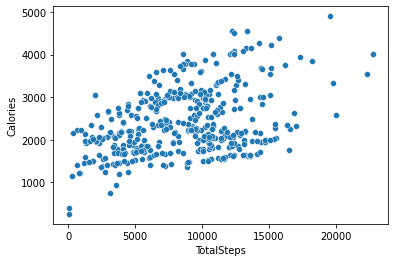

In [23]:

a=sns.scatterplot(x="TotalSteps", y="Calories", data=total_df)

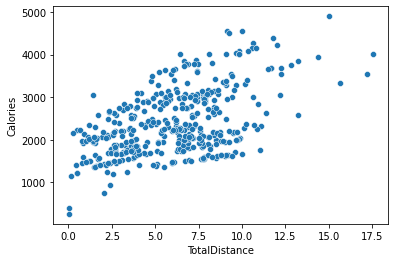

In [24]:
a=sns.scatterplot(x="TotalDistance", y="Calories", data=total_df)

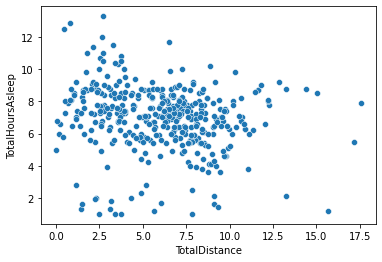

In [25]:
a=sns.scatterplot(x="TotalDistance", y="TotalHoursAsleep", data=total_df)

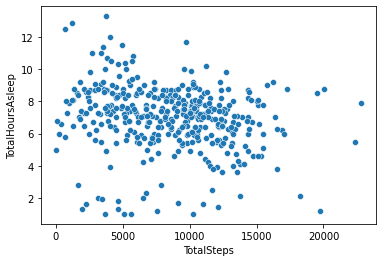

In [26]:

a=sns.scatterplot(x="TotalSteps", y="TotalHoursAsleep", data=total_df)

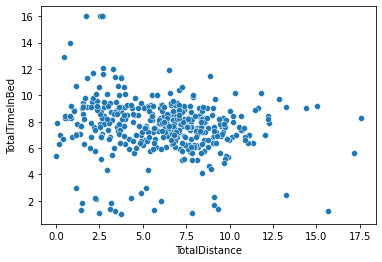

In [27]:
a=sns.scatterplot(x="TotalDistance", y="TotalTimeInBed", data=total_df)

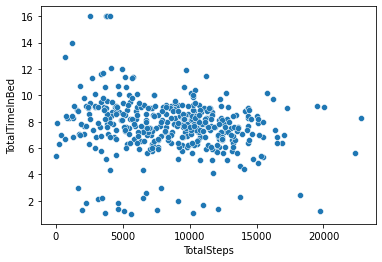

In [28]:

a=sns.scatterplot(x="TotalSteps", y="TotalTimeInBed", data=total_df)


In [29]:
total_df = total_df.drop('ActivityDay',axis = 1)
total_df = total_df.drop('SleepDay',axis=1)


In [30]:
total_df['ActivityDate'] = pd.to_datetime(total_df['ActivityDate'], format='%m/%d/%Y')
total_df['ActivityDate'] = total_df['ActivityDate'].dt.strftime('%m%d%Y').astype(int)
print(total_df.dtypes)

Id                     int64
ActivityDate           int32
TotalSteps             int64
TotalDistance        float64
Calories               int64
TotalSleepRecords      int64
TotalHoursAsleep     float64
TotalTimeInBed       float64
dtype: object


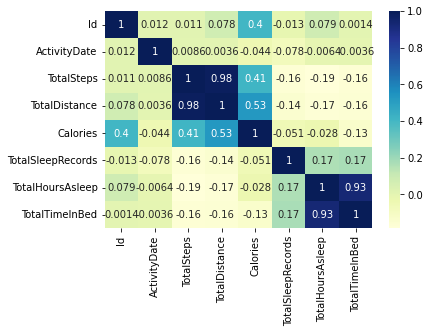

In [31]:
sns.heatmap(total_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [32]:
def pearson_correlation(df, column1, column2):
    x = df[column1]
    y = df[column2]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_standard_deviation = np.std(x)
    y_standard_deviation = np.std(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = len(x) * x_standard_deviation * y_standard_deviation
    return numerator / denominator

def show_pearson_correlation(df, column1, column2):
    corr = pearson_correlation(df, column1, column2)
    print(f"{column1} and {column2} Correlation: {corr}")





In [33]:
show_pearson_correlation(total_df, 'TotalDistance', 'Calories')
show_pearson_correlation(total_df, 'TotalSteps', 'Calories')
show_pearson_correlation(total_df, 'TotalDistance', 'TotalHoursAsleep')
show_pearson_correlation(total_df, 'TotalSteps', 'TotalHoursAsleep')

TotalDistance and Calories Correlation: 0.5277278417395549
TotalSteps and Calories Correlation: 0.4119958678671933
TotalDistance and TotalHoursAsleep Correlation: -0.1706517447329394
TotalSteps and TotalHoursAsleep Correlation: -0.18520609934823884


In [34]:
non_numeric_cols = total_df.dtypes[total_df.dtypes == object].index
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [35]:
total_df

,Id,ActivityDate,TotalSteps,TotalDistance,Calories,TotalSleepRecords,TotalHoursAsleep,TotalTimeInBed
0,1503960366,4122016,13162,8.50,1985,1,5.4,5.8
1,1503960366,4132016,10735,6.97,1797,2,6.4,6.8
2,1503960366,4152016,9762,6.28,1745,1,6.9,7.4
3,1503960366,4162016,12669,8.16,1863,2,5.7,6.1
4,1503960366,4172016,9705,6.48,1728,1,11.7,11.9
...,...,...,...,...,...,...,...,...
408,8792009665,4302016,7174,4.59,2896,1,5.7,6.0
409,8792009665,5012016,1619,1.04,1962,1,8.4,8.8
410,8792009665,5022016,1831,1.17,2015,1,6.9,7.0
411,8792009665,5032016,2421,1.55,2297,1,8.6,9.1


In [36]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression(df, column1, column2):
    X = df[[column1]]
    y = df[[column2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    source = ColumnDataSource(data=dict(x=X_test[column1], y=y_test[column2], y_pred=y_pred[:, 0]))
    
    p = figure(plot_width=400, plot_height=400)
    p.scatter(x='x', y='y', source=source, color='gray')
    p.line(x='x', y='y_pred', source=source, color='red', line_width=2)
    p.xaxis.axis_label = column1
    p.yaxis.axis_label = column2
    
    show(p)


In [37]:
linear_regression(total_df, "TotalSteps", "TotalHoursAsleep")

In [38]:
linear_regression(total_df, "TotalSteps", "Calories")

In [39]:
linear_regression(total_df, "TotalDistance", "Calories")

In [40]:

linear_regression(total_df, "TotalDistance", "TotalHoursAsleep")

In [41]:
linear_regression(total_df, "TotalSteps", "TotalHoursAsleep")

In [42]:
df_copy = total_df.copy()

In [43]:

# Define calorie burn intervals
bins = [0, 500, 1000, 1500, float('inf')]
labels = ['Low calorie burn', 'Moderate calorie burn', 'High calorie burn', 'Very high calorie burn']

# Create a new column for calorie burn categories
df_copy['Calorie Burn Category'] = pd.cut(df_copy['Calories'], bins=bins, labels=labels, right=False)

# Count the number of observations in each category
counts = df_copy['Calorie Burn Category'].value_counts()
counts

Very high calorie burn    380
High calorie burn          29
Low calorie burn            2
Moderate calorie burn       2
Name: Calorie Burn Category, dtype: int64

In [44]:
df_copy['SleepCategory'] = pd.cut(df_copy['TotalHoursAsleep'],
                             bins=[0, 5, 8, float('inf')],
                             labels=['Less than 5 hours', 'Between 5-8 hours', 'More than 8 hours'])

# count the number of records in each category and store the result in a new DataFrame
sleep_category_counts = df_copy['SleepCategory'].value_counts().reset_index()

# rename the 'index' and 'SleepCategory' columns
sleep_category_counts.columns = ['Sleep Category', 'Count']

# display the resulting DataFrame
print(sleep_category_counts)

      Sleep Category  Count
0  Between 5-8 hours    249
1  More than 8 hours    113
2  Less than 5 hours     51


In [45]:
from scipy.stats import chi2_contingency
# Create a contingency table of the two variables
contingency_table = pd.crosstab(df_copy["Calorie Burn Category"], df_copy["SleepCategory"])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected)

# Determine the significance level
alpha = 0.05

# Make a conclusion
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between the variables.")



Chi-square statistic:  7.091630240041747
p-value:  0.3124564061700584
Degrees of freedom:  6
Expected frequencies: 
 [[  0.24697337   1.20581114   0.5472155 ]
 [  0.24697337   1.20581114   0.5472155 ]
 [  3.5811138   17.4842615    7.9346247 ]
 [ 46.92493947 229.10411622 103.97094431]]
Fail to reject the null hypothesis. There is no significant association between the variables.


Although it was not part of my original data analysis question, I decided to explore the relationship between sleep time and calorie burn for your own interest. I categorized the data based on standards from the internet and used a chi-square test to determine if there was any relationship between the two. The results showed that there was no significant relationship between sleep time and calorie burn.

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create the ANOVA model
model = ols('TotalSteps ~ Calories', data=total_df).fit()

# perform the ANOVA test
aov_table = sm.stats.anova_lm(model, typ=2)

# print the results
print(aov_table)

                sum_sq     df          F        PR(>F)
Calories  1.208447e+09    1.0  84.026009  2.362102e-18
Residual  5.910930e+09  411.0        NaN           NaN


p-value is very small (2.362102e-18), which suggests that there is a significant difference in the mean calories burned between the groups defined by the total steps taken. This means that the total steps taken and the calories burned are likely to be related.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# create the ANOVA model
model = ols('TotalHoursAsleep ~ TotalSteps', data=total_df).fit()

# perform the ANOVA test
aov_table = sm.stats.anova_lm(model, typ=2)

# print the results
print(aov_table)

                 sum_sq     df          F    PR(>F)
TotalSteps    54.983646    1.0  14.598584  0.000154
Residual    1547.977371  411.0        NaN       NaN


In this case, the p-value is 0.000154, which is less than 0.05, suggesting that the relationship is statistically significant.
